# MACHINE LEARNING PROCESS FLOW

# 1. IMPORTING LIBRARY

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# 2.LOADING THE DATA¶

In [2]:
df = pd.read_csv(r'C:\Users\reena\OneDrive\cstomer transaction original.csv')

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [4]:
df.shape

(1048567, 9)

# 3.EXPLORATORY DATA ANALYSIS(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


In [7]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [10]:
df = df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,25.0
1,M,JHAJJAR,2270.69,27999.0
2,F,MUMBAI,17874.44,459.0
3,F,MUMBAI,866503.21,2060.0
4,F,NAVI MUMBAI,6714.43,1762.5
...,...,...,...,...
1048562,M,NEW DELHI,7635.19,799.0
1048563,M,NASHIK,27311.42,460.0
1048564,M,HYDERABAD,221757.06,770.0
1048565,M,VISAKHAPATNAM,10117.87,1000.0


C:\Users\reena\AppData\Local\Temp\ipykernel_13668\2655641520.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['CustGender']).sum().plot(kind='pie', y='TransactionAmount (INR)')


<Axes: ylabel='TransactionAmount (INR)'>

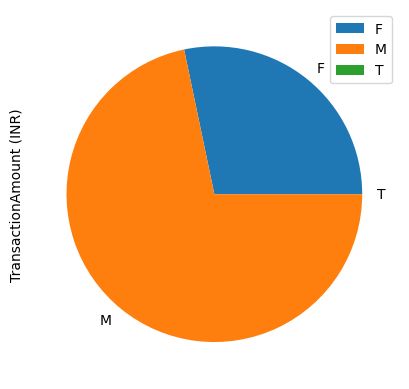

In [11]:
df.groupby(df['CustGender']).sum().plot(kind='pie', y='TransactionAmount (INR)')

In [12]:
df.dtypes

CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionAmount (INR)    float64
dtype: object

In [13]:
le = preprocessing.LabelEncoder()

  
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,0,3557,17819.05,25.0
1,1,3618,2270.69,27999.0
2,0,5219,17874.44,459.0
3,0,5219,866503.21,2060.0
4,0,5606,6714.43,1762.5


In [14]:
df.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionAmount (INR)'],
      dtype='object')

In [15]:
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)',]

In [16]:
df[columns_names].describe().T

,count,mean,std,min,25%,50%,75%,max
CustGender,1041614.0,0.730578,0.443662,0.0,0.00,1.00,1.00,2.000000e+00
CustLocation,1041614.0,4085.712415,2363.229131,0.0,2055.00,4086.00,5738.00,9.274000e+03
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


In [17]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 820
CustLocation               820
CustAccountBalance         820
TransactionAmount (INR)    820
dtype: int64

In [18]:
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

In [19]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64

In [20]:
df['CustLocation'].value_counts()

5219    101918
5738     84057
770      81254
3058     73521
2055     70470
         ...  
1840         1
4225         1
9124         1
6840         1
3403         1
Name: CustLocation, Length: 9271, dtype: int64

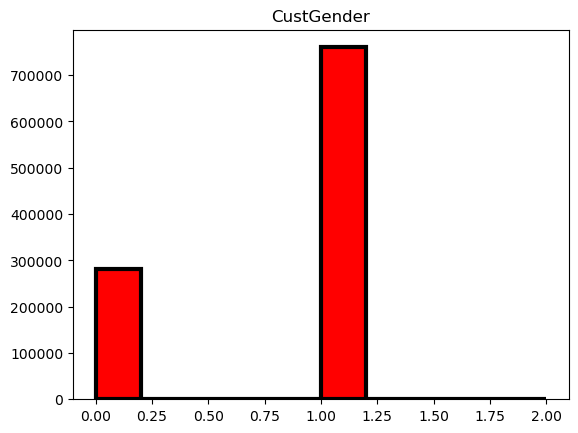

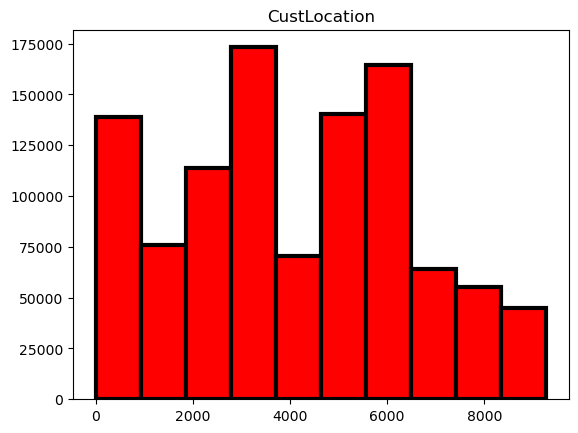

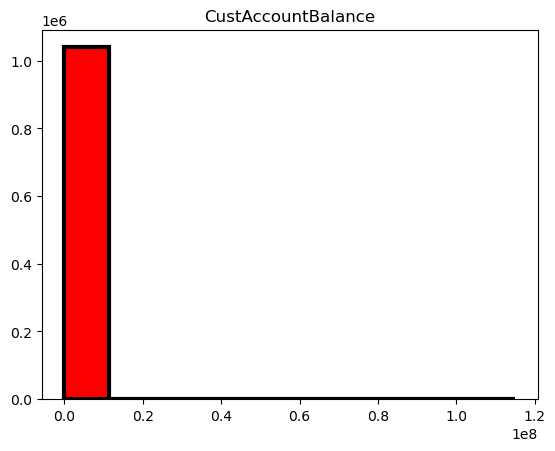

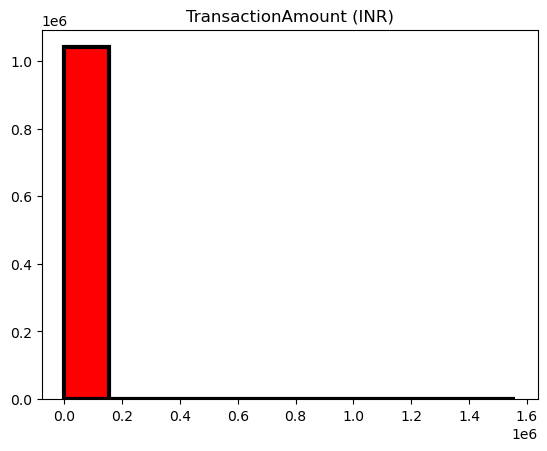

In [21]:
for i in columns_names:
    plt.hist(df[i], color='Red', edgecolor='black', linewidth=3)
    plt.title(i)
    plt.show()
    

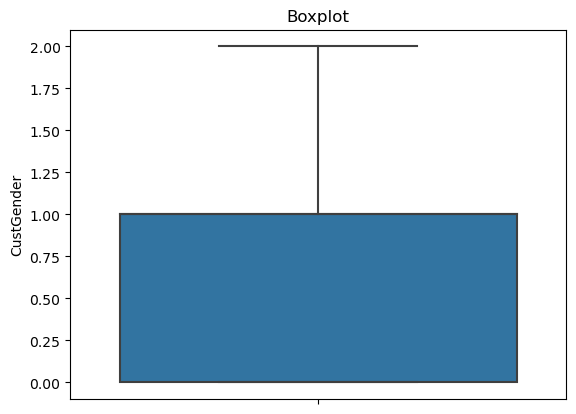

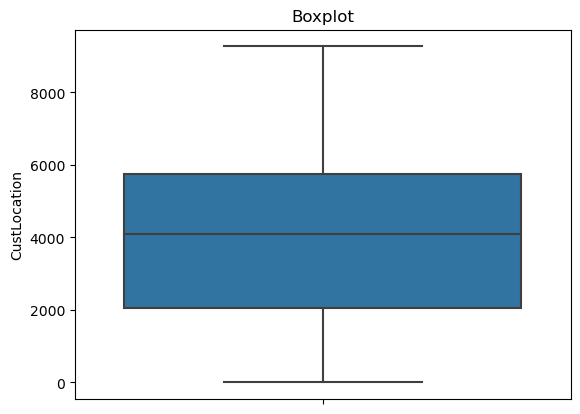

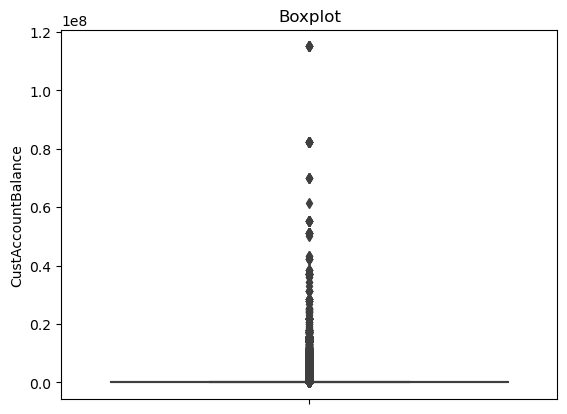

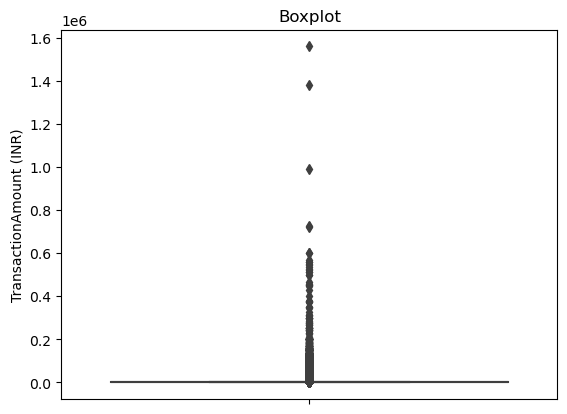

In [22]:
for i in columns_names:
        sns.boxplot(y=df[i])
        plt.title('Boxplot')
        plt.show()

In [23]:
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df,columns=columns_names)
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,-1.646423,-0.223737,-0.114717,-0.234972
1,0.607372,-0.197926,-0.133086,4.026825
2,-1.646423,0.479513,-0.114652,-0.168852
3,-1.646423,0.479513,0.887938,0.075058
4,-1.646423,0.643266,-0.127836,0.029734


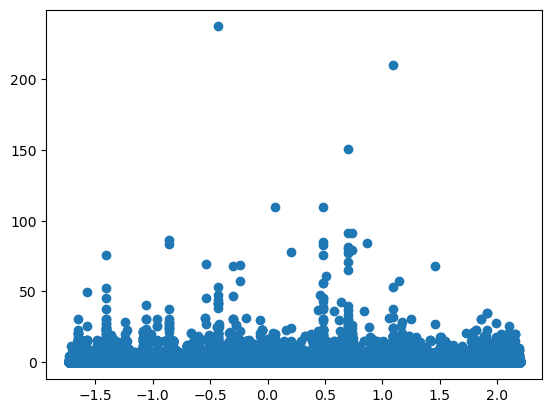

In [24]:
plt.scatter(df['CustLocation'], df['TransactionAmount (INR)'])

# .4 TRAIN-TEST SPLIT

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040794 entries, 0 to 1040793
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1040794 non-null  float64
 1   CustLocation             1040794 non-null  float64
 2   CustAccountBalance       1040794 non-null  float64
 3   TransactionAmount (INR)  1040794 non-null  float64
dtypes: float64(4)
memory usage: 31.8 MB


In [26]:
X=df.values[:,[2,3]]


In [27]:
X

array([[-0.11471719, -0.23497164],
       [-0.13308638,  4.02682513],
       [-0.11465175, -0.1688524 ],
       ...,
       [ 0.12621979, -0.12147202],
       [-0.12381554, -0.08643186],
       [-0.04629466, -0.06114201]])

# 5.BUILDING THE MODEL

# K-MEANS CLUSTERING OR Centroid-based clustering

# K-Means algorithm 
1.Select the number of clusters
2.K Initialize the K centroids 
3.Assign each data point to their closest centroid 4.For each cluster calculate the average of its assigned examples and let it the new position for that centroid
4.Reassign each data example to the new closest centroid of each cluster 
5Update the centroid position The model is ready

C:\Users\reena\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reena\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reena\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reena\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


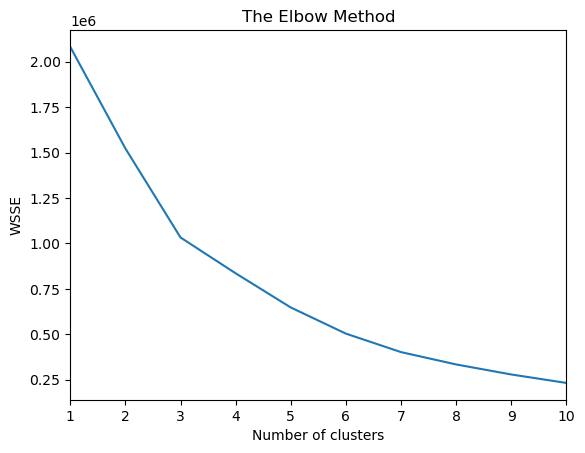

In [28]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []###within the sum of square errors
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlim(1,10)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [29]:
print(wsse)


[2081588.0000000065, 1522722.6835914003, 1032932.7101312828, 835829.9177088459, 647843.5420122342, 503891.4027780642, 402137.77331908076, 334250.48980447726, 279085.87058302504, 232469.8419723386]


In [30]:
kmeans=KMeans(n_clusters= 6, random_state=10)

Y_pred= kmeans.fit_predict(X)


C:\Users\reena\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Y PREDUCTION 

In [31]:
Y_pred

array([0, 2, 0, ..., 0, 0, 0])

In [32]:
kmeans.inertia_

503891.4027780642

In [33]:
kmeans.n_iter_

11

In [34]:
df['Clusters']=Y_pred
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Clusters
0,-1.646423,-0.223737,-0.114717,-0.234972,0
1,0.607372,-0.197926,-0.133086,4.026825,2
2,-1.646423,0.479513,-0.114652,-0.168852,0
3,-1.646423,0.479513,0.887938,0.075058,0
4,-1.646423,0.643266,-0.127836,0.029734,0
...,...,...,...,...,...
1040789,0.607372,0.699120,-0.126749,-0.117054,0
1040790,0.607372,0.632265,-0.103503,-0.168700,0
1040791,0.607372,-0.304133,0.126220,-0.121472,0
1040792,0.607372,2.104351,-0.123816,-0.086432,0


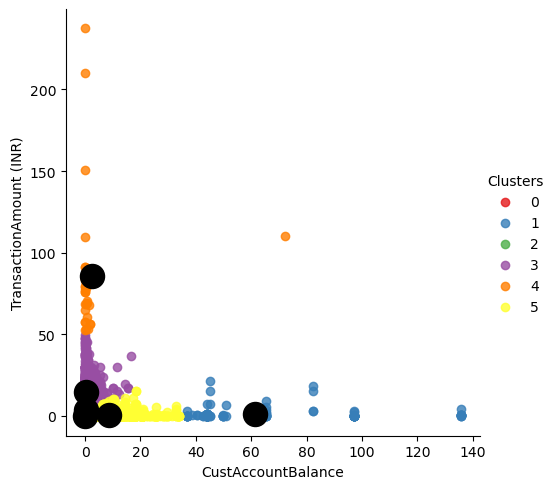

In [35]:
sns.lmplot(data=df, x='CustAccountBalance',y='TransactionAmount (INR)',
          fit_reg=False, #no regression line
          hue='Clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s= 300, c='black')
plt.show()

In [36]:
kmeans.cluster_centers_

array([[-3.52873039e-02, -8.32662600e-02],
       [ 6.15225641e+01,  1.09764638e+00],
       [ 1.60611243e-01,  3.52602953e+00],
       [ 4.73509434e-01,  1.48050752e+01],
       [ 2.49982651e+00,  8.56699000e+01],
       [ 8.71589737e+00,  3.65114359e-01]])

In [37]:
df['Clusters']=df.Clusters.map({0:'Careless',1:'Saving oriented',2:'Sensible',3:'Target',
  4:'Active users',5:'Standerd'})


df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Clusters
0,-1.646423,-0.223737,-0.114717,-0.234972,Careless
1,0.607372,-0.197926,-0.133086,4.026825,Sensible
2,-1.646423,0.479513,-0.114652,-0.168852,Careless
3,-1.646423,0.479513,0.887938,0.075058,Careless
4,-1.646423,0.643266,-0.127836,0.029734,Careless
...,...,...,...,...,...
1040789,0.607372,0.699120,-0.126749,-0.117054,Careless
1040790,0.607372,0.632265,-0.103503,-0.168700,Careless
1040791,0.607372,-0.304133,0.126220,-0.121472,Careless
1040792,0.607372,2.104351,-0.123816,-0.086432,Careless


In [38]:
new_data=df[df['Clusters']=='Target']

In [39]:
new_data.shape

(1726, 5)

In [40]:
new_data

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Clusters
191,0.607372,0.061456,0.021601,14.996069,Target
204,0.607372,0.739318,2.070196,20.768553,Target
778,0.607372,-0.314288,-0.096834,14.996069,Target
884,0.607372,2.136086,-0.122048,14.996069,Target
901,0.607372,-1.085663,1.738568,14.996069,Target
...,...,...,...,...,...
1036997,0.607372,0.061456,0.050108,14.996069,Target
1039729,0.607372,-0.822896,0.232606,14.996069,Target
1040292,-1.646423,-1.242646,0.001281,12.299877,Target
1040300,0.607372,0.061456,0.050108,14.996069,Target


In [41]:
new_data.to_csv(r'Target_cstomer transaction original.csv',index=True)

In [42]:
new_data

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Clusters
191,0.607372,0.061456,0.021601,14.996069,Target
204,0.607372,0.739318,2.070196,20.768553,Target
778,0.607372,-0.314288,-0.096834,14.996069,Target
884,0.607372,2.136086,-0.122048,14.996069,Target
901,0.607372,-1.085663,1.738568,14.996069,Target
...,...,...,...,...,...
1036997,0.607372,0.061456,0.050108,14.996069,Target
1039729,0.607372,-0.822896,0.232606,14.996069,Target
1040292,-1.646423,-1.242646,0.001281,12.299877,Target
1040300,0.607372,0.061456,0.050108,14.996069,Target


# 6.CONCLUSION

# From the sample of the dataset, we can divide the customers into two main groups.

# #The cluster 3 ( Target)
represents the customers being around young youth. 
They spend amount in a moderate form of transaction and 
they are quality customers for bank products and
also they spend alot time in application and 
possess litle amount in their account after the active transaction.

# The cluster 1(saving oriented)
represents the customers being around aged person. 
They spend very less amount in per transaction and
spend very few time in application. They possesss large amount in a saving form in their account.
They are saving loving person so do not uses application for transaction frequently.

# In other words, customers in cluster 4 (Active users)
represents the customers being around very young yuth genration. 
They spend excessive time over the applicaion and huge amount  amount in per transaction and
 They possesss very very little amount  in a saving form in their account.
They are careless person so they  uses application for tfrequently.
